In [1]:
##importing the required libraries##
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_DF_AK=pd.read_csv('namesbystate/AK.txt', delimiter=',', names=['State','Sex','Year Born','Name','Name Frequency'])
train_DF_AK.head()

,State,Sex,Year Born,Name,Name Frequency
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


1.  Please describe the format of the data files. Can you identify any 
    limitations or distortions of the data? 

**The list of names for each states is a comma delimited text file which 5 columns describing the State, Sex, Year Born, Names, and Name Frequency**

In [3]:
##Creating a big DataFrame (train_DF_popular) containing the data from all states##
train_DF_all=pd.DataFrame()
for fil in glob.glob('./namesbystate/*.TXT'):
     train_DF_all=train_DF_all.append(pd.read_csv(fil, delimiter=',', names=['State','Sex','Year Born','Name',\
                                                     'Name Frequency']), ignore_index=True)

In [12]:
##Grouping by Name and couting the total frequency for each name to find the most popular name##
train_DF_total_freq=train_DF_all.groupby('Name').sum()['Name Frequency']
print "The most popular name of all time is:", train_DF_total_freq.idxmax(),'\n','With total count of:',\
train_DF_total_freq.ix[train_DF_total_freq.idxmax()]

SyntaxError: invalid syntax (<ipython-input-12-39e00ca9d012>, line 3)

What is the most popular name of all time? (Of either gender.)

The most popular name of all time is: **James** With total count of **4957166**

In [9]:
female_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2013]\
                          .groupby(['Sex','Name']).sum()['Name Frequency'].ix['F'])
male_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2013]\
                        .groupby(['Sex','Name']).sum()['Name Frequency'].ix['M'])
male_female_inner_join=pd.concat([female_names, male_names], axis=1, join='inner')
print "The most gender ambiguos name in 2013 is:", male_female_inner_join.sum(axis=1).idxmax()
print male_female_inner_join.sum(axis=1).max()

Emma
20911


In [10]:
female_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1945]\
                          .groupby(['Sex','Name']).sum()['Name Frequency'].ix['F'])
male_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1945]\
                        .groupby(['Sex','Name']).sum()['Name Frequency'].ix['M'])
male_female_inner_join=pd.concat([female_names, male_names], axis=1, join='inner')
print "The most gender ambiguos name in 1945 is:", male_female_inner_join.sum(axis=1).idxmax()
print male_female_inner_join.sum(axis=1).max()

James
74755


3.  What is the most gender ambiguous name in 2013? 1945?

The most gender ambiguos name in 2013 is: **Emma** With total count of **20881**

The most gender ambiguos name in 1945 is: **James** With total count of **74651**

In [92]:
names_1980 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1980].groupby('Name').sum()['Name Frequency'])
names_2014 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2014].groupby('Name').sum()['Name Frequency'])
names_1980_2014 = pd.merge(names_1980, names_2014, left_index=True, right_index=True, \
                           suffixes=['_1980', '_2014'], how='inner')
names_1980_2014['names_rate_increase']=100*(names_1980_2014['Name Frequency_2014']-\
                                    names_1980_2014['Name Frequency_1980'])/(names_1980_2014['Name Frequency_1980'])
largest_increase = names_1980_2014.ix[names_1980_2014['names_rate_increase'].idxmax()]
print "%s has had the largest increase of %d percent" %(names_1980_2014['names_rate_increase'].idxmax(),\
                                                        largest_increase['names_rate_increase'])

Colton has had the largest increase of 126840 percent


In [95]:
names_1980_2014['names_rate_decrease']=100*(names_1980_2014['Name Frequency_1980']-\
                                    names_1980_2014['Name Frequency_2014'])/(names_1980_2014['Name Frequency_2014'])
largest_decrease = names_1980_2014.ix[names_1980_2014['names_rate_decrease'].idxmax()]
print "%s has had the largest decrease of %f percent" %(names_1980_2014['names_rate_decrease']\
                                                        .idxmax(),largest_decrease['names_rate_decrease'])

Latoya has had the largest decrease of 49500.000000 percent


Of the names represented in the data, find the name that has had the largest 
    percentage increase in popularity since 1980. Largest decrease?
    
**Colton** has had the largest increase of **126840%**

**Latoya** has had the largest decrease of **49500%**


Can you identify names that may have had an even larger increase or decrease 
    in popularity?
    
**If we include the names that has had 0 count in one of the years (2014 or 1980), we can recalculate the increase/decrease in popularity and get even larger increase/decrease as follows**

In [100]:
names_1980 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1980].groupby('Name').sum()['Name Frequency'])
names_2014 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2014].groupby('Name').sum()['Name Frequency'])
names_1980_2014 = pd.merge(names_1980, names_2014, left_index=True, right_index=True, \
                           suffixes=['_1980', '_2014'], how='outer').fillna(0)
names_1980_2014['names_rate_increase']=100*(names_1980_2014['Name Frequency_2014']-\
                                    names_1980_2014['Name Frequency_1980'])/(1+names_1980_2014['Name Frequency_1980'])
largest_increase = names_1980_2014.ix[names_1980_2014['names_rate_increase'].idxmax()]
print "%s has had even larger increase of %d percent" %(names_1980_2014['names_rate_increase']\
                                                        .idxmax(),largest_increase['names_rate_increase'])

Jayden has had the largest increase of 1342900 percent


In [101]:
names_1980_2014['names_rate_decrease']=100*(names_1980_2014['Name Frequency_1980']-\
                                    names_1980_2014['Name Frequency_2014'])/(1+names_1980_2014['Name Frequency_2014'])
largest_decrease = names_1980_2014.ix[names_1980_2014['names_rate_decrease'].idxmax()]
print "%s has had even larger decrease of %f percent" %(names_1980_2014['names_rate_decrease']\
                                                        .idxmax(),largest_decrease['names_rate_decrease'])

Tonya has had the largest decrease of 308100.000000 percent


B) Onward to Insight!
What insight can you extract from this dataset? Feel free to combine the baby 
names data with other publicly available datasets or APIs, but be sure to include 
code for accessing any alternative data that you use.
This is an open-ended question and you are free to answer as you see fit. In 
fact, we would love it if you find an interesting way to look at the data that 
we haven't thought of! 

**One observation I had was that the increase/decrease of popularity of the babiy names seem to have a very strong correlation with what's happening in the world. For example:**

There is a sharp popularity increase in the name "Neil" in 1969-1972 after Neil Armstrong stepped on the moon in 1969!

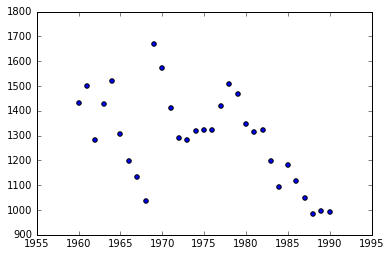

In [179]:
plt.scatter(train_DF_all.ix[train_DF_all['Name']=='Neil'].groupby(['Year Born']).sum().ix[1960:1990].index,\
            train_DF_all.ix[train_DF_all['Name']=='Neil'].groupby(['Year Born']).sum().ix[1960:1990]['Name Frequency'])

One more observation I had was assuming the life expectancy of 80 years in USA (http://www.huffingtonpost.com/2013/11/21/us-life-expectancy-oecd_n_4317367.html) we can predict the age of a person by the average age of the people who has the same name and are born after $2014-80= 1934$

The everaging can be done in a weighted average fashion. i.e., 
$$
Predicted\_Average\_Age =\frac{\Sigma (Age*Name\_Frequency)}{\Sigma(Name\_Frequency)}
$$

Where 
$$
age=2014-Year Born
$$

It is crucial to calculate the weighted variance/standard deviation as well to get more confidence in the average age estimation:
$$
Standard\_Devidation\_Age=\sqrt(\frac{\Sigma Name\_Frequency*(Age-Predicted\_Average\_Age)^2}{\Sigma(Name\_Frequency)})
$$
The following function looks at the data from 1934 to 2014 and derive the weighted average and weighted variance for each given name

In [96]:
def age_predictor (name):
    age_DF=train_DF_all.ix[train_DF_all['Name']==name].groupby(['Year Born']).sum().ix[1934:]
    age_DF=age_DF.reset_index()
    age_DF['age']=pd.DataFrame(2014-age_DF['Year Born'])
    age_DF['Weighted Age']=age_DF['age']*age_DF['Name Frequency']
    age_DF_mean=age_DF['Weighted Age'].sum()/(age_DF['Name Frequency'].sum())
    age_DF['Weighted (Age-Mean)^2']=pow((age_DF['age']-age_DF_mean),2)*age_DF['Name Frequency']
    age_DF_std=sqrt((age_DF['Weighted (Age-Mean)^2'].sum())/(age_DF['Name Frequency'].sum()))
    return age_DF_mean, age_DF_std

For example the average and variance of the age of a person named "Neil" can be calculated as below:

In [97]:
Neil_mean, Neil_Variance = age_predictor ('Neil')
print "Neil Predicted Age is %f with Variance %f" %(Neil_mean, Neil_Variance)

SyntaxError: invalid syntax (<ipython-input-97-a48290dca3ce>, line 2)

Also looking at the average age of people named **Latoya** and **Colton** we can see that the average age of "Latoya" is much higher than "Colton" which is inline with their popularity decrease and increase, respectively.

In [98]:
age_predictor ('Latoya')

(31.327351302172183, 4.9164213519151883)

In [99]:
age_predictor ('Colton')

(10.608100120258454, 7.8101360740412877)

In [100]:
age_predictor ('Jack')

(40.50350725140117, 27.970433399790732)